# 분류 - 서포트 백터 머신

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제

유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

데이터 : 유방암.CSV(변수: 31개, 자료 수: 569개)-.목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개)

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

In [2]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/유방암.csv", engine = "python", encoding="CP949")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:


scaler = StandardScaler()

df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace =False)
df_raw_y = df_raw["diagnosis"]

v_feature_name = df_raw_x.columns

df_scaled_x = scaler.fit_transform(df_raw_x)
df_scaled_x = pd.DataFrame(df_scaled_x, columns=v_feature_name)

df_scaled_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [4]:
set_random = 1234

# test 데이터 프레임 만들기
df_temp_x, df_scaled_test_x, df_temp_y, df_test_y = train_test_split(df_scaled_x,
                                                           df_raw_y, 
                                                           test_size=0.3,
                                                           random_state=set_random)
# temp 데이터 프레임을 train과 validation로 3:4 비율로 나누기
df_scaled_train_x, df_scaled_validation_x, df_train_y, df_validation_y = train_test_split(df_temp_x,
                                                                         df_temp_y, 
                                                                         test_size=3/7,
                                                                         random_state=set_random)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
test data X size : (171, 30)
test data Y size : (171,)


In [5]:
svm_scaled = SVC()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Score on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Score on training set: 0.996
Score on test set: 0.936


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 파라미터 조정

### C규제

In [6]:
train_accuracy = []; validation_accuracy = []

para_C = [10**c for c in range(-2, 3)]

for v_C in para_C:
    svm = SVC(C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x, df_validation_y))

df_score_C = pd.DataFrame()
df_score_C["C"] = para_C
df_score_C["TrainAccuracy"] = train_accuracy
df_score_C["ValidationAccuracy"] = validation_accuracy

df_score_C.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.630,0.637
1,0.10,0.974,0.947
2,1.00,0.996,0.965
3,10.00,0.996,0.959
4,100.00,1.000,0.936


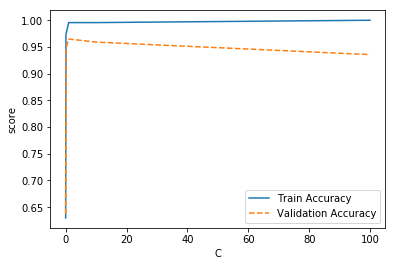

In [7]:
plt.plot(para_C, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_C, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("score"); plt.xlabel("C")
plt.legend()

In [8]:
set_C = 1

In [12]:
train_accuracy = []; validation_accuracy = []
para_gamma = [10 ** gamma for gamma in range(-2, 3)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=set_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x, df_validation_y))

df_score_gamma = pd.DataFrame()
df_score_gamma["gamma"] = para_gamma
df_score_gamma["TrainScore"] = train_accuracy
df_score_gamma["TestScore"] = validation_accuracy
  
df_score_gamma.round(3)

,gamma,TrainScore,TestScore
0,0.01,0.987,0.971
1,0.10,0.996,0.947
2,1.00,1.000,0.637
3,10.00,1.000,0.637
4,100.00,1.000,0.637


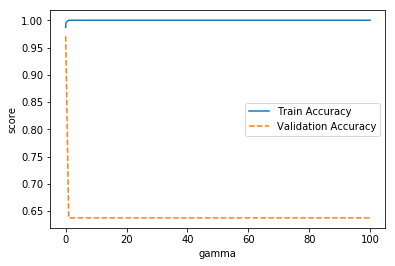

In [13]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_gamma, validation_accuracy, linestyle="--", label = "Validation Accuracy")
plt.ylabel("score");plt.xlabel("gamma")
plt.legend()

In [14]:
set_gamma = 0.01

In [15]:
svc_final = SVC(C=set_C,
               gamma=set_gamma)
svc_final.fit(df_scaled_train_x, df_train_y)

y_pred = svc_final.predict(df_scaled_test_x)

print("Score on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n".format(confusion_matrix(df_test_y, y_pred)))

Score on training set: 0.987
Score on test set: 0.930
Confusion matrix: 



분류